### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. You **ONLY** change the parts of the code we asked you to, nowhere else (change only the coding parts saying `# YOUR CODE HERE`, nothing else);
6. Don't add any new cells to this notebook;
7. Fill in your group number and the full names of the members in the cell below;
8. Make sure that you are not running an old version of IPython (we provide you with a cell that checks this, make sure you can run it without errors).

Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you the following steps before submission for ensuring that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

---

Group number and member names:

In [1]:
GROUP = "Project Group 22"
NAME1 = "Renjith Sebastian"
NAME2 = "Nickey Lizbat Lawrence"

Make sure you can run the following cell without errors.

In [2]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

---

# HA1 - Cats and dogs

<img src="http://lghttp.32478.nexcesscdn.net/80E972/organiclifestylemagazine/wp-content/uploads/2015/10/Cats-and-Dogs.jpg" alt="Cats and dogs" style="width: 5000px;"/>

For this home assignment, we'll use the Kaggle dataset for the [Dogs vs. Cats competition](https://www.kaggle.com/c/dogs-vs-cats). It is comprised of 25k colored images of dogs and cats. Our goal with this dataset will be to create a classifier that can tell us if the input image is of a cat or a dog.

As a way of helping you speed up the training process, each group gets 6 hours of access to an instance in Google Cloud with a K80 GPU. Take a look at the [Instructions folder](https://github.com/JulianoLagana/deep-machine-learning/tree/master/Instructions) to understand how to connect to this instance and use our tools there. You're free to use this resource as you see fit, but if you run out of hours you'll need a late day to obtain more (and you can only do this once).

In order to make the most out of your GPU hours, first try solving the initial part of this notebook (tasks 0-4) in your own computer (these tasks can be solved only on the CPU), and leave most of the available hours for solving tasks 5-6, and refining your best model further (and, if you have the spare hours, experiment a bit!).

Requirements:
- Whenever we ask you to plot anything, be sure to add a title and label the axes. If you're plotting more than one curve in the same plot, also add a legend.
- When we ask you to train an architecture, train it for a reasonable number of epochs. "Reasonable" here means you should be fairly confident that training for a higher number of epochs wouldn't impact your conclusions regarding the model's performance.

Tips:
- If you get errors saying you've exhausted the GPU resources, well, then you exhausted the GPU resources ;). However, sometimes that's because TensorFlow didn't release a part of the GPU's memory. If you think your CNN should fit in your memory during training, try restarting the kernel and directly training only that architecture.
- Every group has enough credits on google cloud to complete this assignment. However, this statement assumes you'll use your resources judiciously (e.g. always try the code first in your machine and make sure everything works properly before starting your instances) and **won't forget to stop your instance after using it,**  otherwise you might run out of credits.
- Before starting, take a look at the images we'll be using. This is a hard task, don't get discouraged if your first models perform poorly (several participants in the original competition didn't achieve an accuracy higher than 60%).

---
## 0. Imports

In the following cell, add all the imports you'll use in this assignment.

In [1]:
# YOUR CODE HERE

# The package for importing the dataset (already provided by Keras)
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Packages for defining the architecture of our model
from keras.optimizers import Adam
from keras.models import Sequential, Model, load_model
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense

#VGG16 model
from keras.applications.vgg16 import VGG16

# One-hot encoding
from keras.utils import np_utils

# Callbacks for training
from keras.callbacks import TensorBoard, EarlyStopping

# Ploting
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
from os.path import splitext
import csv

Using TensorFlow backend.


---
## 1. Loading the data and preprocessing

The first step is to head to the [Kaggle website for the cats and dogs competition](https://www.kaggle.com/c/dogs-vs-cats) and download the data from there. You should download both the test and train folders together in one zip file (by clicking the download all button). The split ratio between training and validation has not been made, you'll need to do it yourself. The `test.zip` file contains unlabeled data, so that participants in the contest are not able to train on this set.

For this assignment you should use [data generators](https://keras.io/preprocessing/image/) to load the images to your CPU/GPU memory. Because of this, your folder structure for the data should conform to the folder structure expected by the data generators (i.e. the samples should be separated into one folder for each class). Furthermore, we ask you to first start with a smaller subset of the data (1/5 of the number of samples), in order to test different models faster.

This means that you should create a folder structure that resembles the following (obviously, the folder names are up to you):


         small_train             small_val                train                   val
              |                      |                      |                      |
              |                      |                      |                      |
        -------------          -------------          -------------          -------------
        |           |          |           |          |           |          |           |
        |           |          |           |          |           |          |           |
      Cats        Dogs       Cats        Dogs       Cats        Dogs       Cats        Dogs

The `small_train` and `small_val` folders have the training and validation samples for your smaller subset of the data, while the `train` and `val` folders contain all the samples you extracted from Kaggle's `train.zip`. We provide you a notebook that shows how to achieve this ("Create project structure.ipynb"), starting from the original `all.zip` file that you download from Kaggle. If you do use that notebook, we encourage you to understand how each step is being done, so you can generalize this knowledge to new datasets you'll encounter.

We advise you to use 30% of the data as validation data in the smaller dataset. However, for the larger dataset, you should decide how to split between training and validation. Please specify your splits in the following cells.

For the larger subset, what was the training/validation split that you decided to use?

**% Samples in the training set:**

In [4]:
# YOUR CODE HERE

trainPercentage = 0.8 # 80%

**% Samples in the validation set:**

In [5]:
# YOUR CODE HERE

valPercentage = 0.2 # 20%

Fill in the dataset paths (to be used later by your data generators):

In [2]:
# YOUR CODE HERE

trainDatasetPath = './small_train'
valDatasetPath = './small_val'
trainDatasetPathFull = './train'
valDatasetPathFull = './val'

---
Once you have the expected folder structure, create two data generators for automatically generating batches from the images in your smaller subset of data. Don't use any [data augmentation](https://cartesianfaith.com/2016/10/06/what-you-need-to-know-about-data-augmentation-for-machine-learning/), but feel free to preprocess the data as you see fit. After instantiating them, run the `flow_from_directory` method with the desired arguments.

Hints:
- The specified `batch_size` should be chosen so that your don't run out of memory.
- When feeding the images to your CNN, you'll probably want all of them to have the same spatial size, even though the .jpeg files differ in this. If so, take a look at the argument `target_size` for the `flow_from_directory` method of data generators.
- Resizing the images to a smaller size while loading them can be beneficial.

In [3]:
# YOUR CODE HERE

train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
        trainDatasetPath,
        target_size = (56,56),
        batch_size=32,
        class_mode='categorical')

val_data = val_datagen.flow_from_directory(
        valDatasetPath,
        target_size=(56, 56),
        batch_size=32,
        class_mode='categorical')

inputShape = (56,56,3)

Found 3500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


---
## 2. Training

Create your first CNN architecture for this task. Start with something as simple as possible, that you're almost sure can get an accuracy better than 50% (we'll improve upon it later).

Tip:
- If Tensorflow is your backend, your `input_shape` is always `(img_width, img_height, 3)` (i.e. channels **last**)

In [4]:
# YOUR CODE HERE

def BaseModel():

    # create model
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), input_shape=inputShape, activation="relu", data_format="channels_last"))
    
    model.add(Conv2D(32, (3, 3), input_shape=inputShape, activation="relu"))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(128))
    model.add(Activation("relu"))
    
    model.add(Dense(2))
    model.add(Activation("softmax"))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

Train your model using the `fit_generator` method and the two data generators you created earlier. Train for a reasonable amount of epochs, so as to get a good sense of how well this architecture performs.

Tips:
- Usually the bottleneck is when loading the images from the disk. To speed up training, make sure to take a look at the arguments `workers` and `use_multiprocessing` of `fit_generator`.
- You don't have to set the argument `steps_per_epoch` to the number of batches in an epoch. Instead, you can choose a lower number to obtain more frequent prints about the current loss and accuracy of your model (but then have in mind that you're not actually training for the number of epochs you specify in `epochs`).

In [5]:
# YOUR CODE HERE

epochs = 20

baseModel = BaseModel()
# Fit the model
tb = TensorBoard(log_dir='./logs/Final/BaseModel')
baseModelHistory = baseModel.fit_generator(train_data, epochs=epochs, steps_per_epoch = 50, validation_data=val_data, callbacks=[tb])

Epoch 1/20
50/50 [==============================] - 65s 1s/step - loss: 0.7041 - acc: 0.5488 - val_loss: 0.6624 - val_acc: 0.5887
Epoch 2/20
50/50 [==============================] - 36s 729ms/step - loss: 0.6564 - acc: 0.6244 - val_loss: 0.6792 - val_acc: 0.5647
Epoch 3/20
50/50 [==============================] - 26s 519ms/step - loss: 0.6078 - acc: 0.6756 - val_loss: 0.6064 - val_acc: 0.6940
Epoch 4/20
50/50 [==============================] - 26s 519ms/step - loss: 0.5695 - acc: 0.7100 - val_loss: 0.6173 - val_acc: 0.6760
Epoch 5/20
50/50 [==============================] - 27s 531ms/step - loss: 0.5128 - acc: 0.7450 - val_loss: 0.6087 - val_acc: 0.6853
Epoch 6/20
50/50 [==============================] - 26s 520ms/step - loss: 0.5044 - acc: 0.7531 - val_loss: 0.6200 - val_acc: 0.6747
Epoch 7/20
50/50 [==============================] - 26s 522ms/step - loss: 0.4475 - acc: 0.7956 - val_loss: 0.6985 - val_acc: 0.6967
Epoch 8/20
50/50 [==============================] - 26s 526ms/step - los

Create one figure with two axes. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

Hint:
- The `fit_generator` method returns a `history` object.

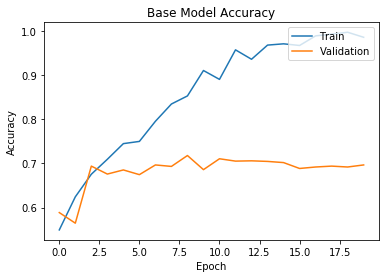

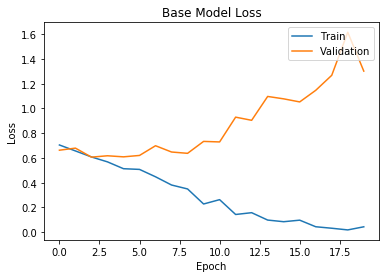

In [6]:
# YOUR CODE HERE

#  "Accuracy"
plt.plot(baseModelHistory.history['acc'])
plt.plot(baseModelHistory.history['val_acc'])
plt.title('Base Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# "Loss"
plt.plot(baseModelHistory.history['loss'])
plt.plot(baseModelHistory.history['val_loss'])
plt.title('Base Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Based on these, what would you suggest for improving your model? Why?

**Your answer:** When the model was validated on the validation set, we obtained constant validation accuracy and validation loss as could be seen from above graphs. The validation accuracy is 0.5 which indicates that the model can correctly classify only 50% of the images as dog or cat which is not expected. Unlike validation accuracy and validation loss, training accuracy and training loss are not constant. But we can see that they are almost in the same range. Thus we can conclude thast the model experiences high bias. 

Following methods could be adopted to avoid high bias.
1. Make the network deeper with more layers.
2. Increase the number of filters in each layer.
3. Train longer

---
## 3. Improving your initial model

Improve your initial model according to you answer above. Write the new definition in the cell below and train it.

In [7]:
# YOUR CODE HERE


def ModifiedModel():
    
    # create model
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), input_shape=inputShape, activation="relu", data_format="channels_last"))
    
    model.add(Conv2D(32, (3, 3), activation="relu"))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation="relu"))
    
    model.add(Conv2D(64, (3, 3), activation="relu"))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(128))
    model.add(Activation("relu"))
    
    model.add(Dense(2))
    model.add(Activation("softmax"))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model
    

modifiedModel = ModifiedModel()
# Fit the model
tb = TensorBoard(log_dir='./logs/Final/ModifiedModel')
modifiedModelHistory = modifiedModel.fit_generator(train_data, epochs=epochs, steps_per_epoch = 50, validation_data=val_data, callbacks=[tb])


Epoch 1/20
50/50 [==============================] - 52s 1s/step - loss: 0.6946 - acc: 0.5158 - val_loss: 0.6905 - val_acc: 0.5173
Epoch 2/20
50/50 [==============================] - 57s 1s/step - loss: 0.6845 - acc: 0.5506 - val_loss: 0.6748 - val_acc: 0.5707
Epoch 3/20
50/50 [==============================] - 57s 1s/step - loss: 0.6614 - acc: 0.6019 - val_loss: 0.6334 - val_acc: 0.6467
Epoch 4/20
50/50 [==============================] - 53s 1s/step - loss: 0.6558 - acc: 0.6312 - val_loss: 0.6462 - val_acc: 0.6140
Epoch 5/20
50/50 [==============================] - 52s 1s/step - loss: 0.6388 - acc: 0.6328 - val_loss: 0.6138 - val_acc: 0.6613
Epoch 6/20
50/50 [==============================] - 52s 1s/step - loss: 0.6095 - acc: 0.6675 - val_loss: 0.6328 - val_acc: 0.6340
Epoch 7/20
50/50 [==============================] - 52s 1s/step - loss: 0.5877 - acc: 0.6900 - val_loss: 0.5916 - val_acc: 0.6787
Epoch 8/20
50/50 [==============================] - 52s 1s/step - loss: 0.5562 - acc: 0.69

How does the model perform, compared to the initial model? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

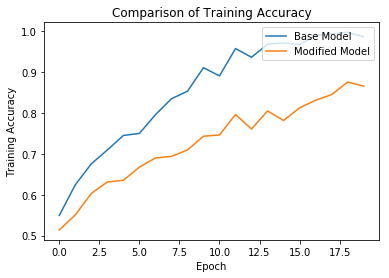

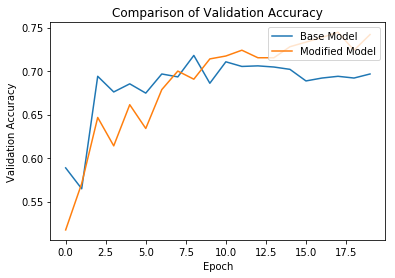

In [8]:
# YOUR CODE HERE

#  "Training Accuracy"
plt.plot(baseModelHistory.history['acc'])
plt.plot(modifiedModelHistory.history['acc'])
plt.title('Comparison of Training Accuracy')
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.legend(['Base Model', 'Modified Model'], loc='upper right')
plt.show()

# "Loss"
plt.plot(baseModelHistory.history['val_acc'])
plt.plot(modifiedModelHistory.history['val_acc'])
plt.title('Comparison of Validation Accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['Base Model', 'Modified Model'], loc='upper right')
plt.show()

Did your results improve? Explain why, or why not.

**Your answer:** No, the model is still experiencing from high bias. We made the network more deep by adding two more layes in addition to the layers in base model. Also, we increased the number of filter in the newly added layers to 64 to eliminate high bias. In addition to the model changes, we trained the network for 100 epochs to check if there is any improvement in the training accuracy. The new model doesn't seem to avoid high bias as we expected.

---
## 4. Obtaining the *best* model

Continue to improve your model architecture by comparing the value of the metrics you're interested in both the training and validation set. Try different ideas, and consider comparing them using tensorboard. When you're happy with one architecture, copy it in the cell below and train it here. Save the optimization history (i.e. the `history` object returned by the `fit_generator`). You'll use this later to compare your best model with the one using transfer learning.

**Note**: When trying different ideas, you'll end up with several different models. However, when submitting your solutions to ping-pong, the cell below must contain only the definition and training of *one* model. Remove all code related to the models that were not chosen.

In [ ]:
# YOUR CODE HERE

epochs = 25
def BestModel():
    
    inputShape = (56,56,3)
    initLearningRate = 1e-3

    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape, data_format="channels_last"))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))

    model.add(Conv2D(32, (3, 3), padding="same"))
    model.add(BatchNormalization(axis=-1))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(BatchNormalization(axis=-1))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    
    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(BatchNormalization(axis=-1))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(256, (3, 3), padding="same"))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    
    model.add(Conv2D(256, (3, 3), padding="same"))
    model.add(BatchNormalization(axis=-1))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(128))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    
    model.add(Dense(128))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    
    model.add(Dense(2, activation='softmax'))
    
    # Compile model
    opt = Adam(lr=initLearningRate, decay=initLearningRate / epochs)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

bestModel = BestModel()
tb = TensorBoard(log_dir='./logs/Final/BestModel')
bestModelHistory = bestModel.fit_generator(train_data, epochs=epochs, validation_data=val_data, callbacks=[tb])

Epoch 1/25
110/110 [==============================] - 485s 4s/step - loss: 0.6802 - acc: 0.6109 - val_loss: 0.6823 - val_acc: 0.6573
Epoch 2/25
110/110 [==============================] - 474s 4s/step - loss: 0.6139 - acc: 0.6710 - val_loss: 0.7377 - val_acc: 0.6227
Epoch 3/25
110/110 [==============================] - 507s 5s/step - loss: 0.5701 - acc: 0.7047 - val_loss: 0.7602 - val_acc: 0.6073
Epoch 4/25
110/110 [==============================] - 605s 5s/step - loss: 0.5166 - acc: 0.7386 - val_loss: 0.8259 - val_acc: 0.6593
Epoch 5/25
110/110 [==============================] - 558s 5s/step - loss: 0.4739 - acc: 0.7735 - val_loss: 0.6098 - val_acc: 0.6833
Epoch 6/25
110/110 [==============================] - 537s 5s/step - loss: 0.4191 - acc: 0.8117 - val_loss: 0.8711 - val_acc: 0.6380
Epoch 7/25
110/110 [==============================] - 522s 5s/step - loss: 0.3765 - acc: 0.8232 - val_loss: 1.4139 - val_acc: 0.5480
Epoch 8/25
110/110 [==============================] - 539s 5s/step - 

Create one figure with two axes. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

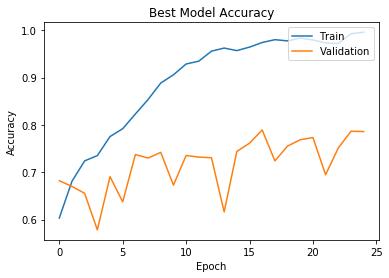

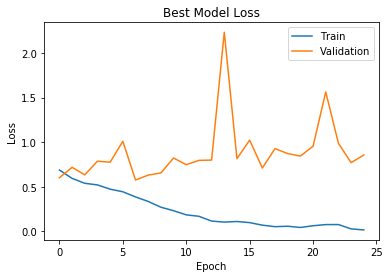

In [10]:
# YOUR CODE HERE

#  "Accuracy"
plt.plot(bestModelHistory.history['acc'])
plt.plot(bestModelHistory.history['val_acc'])
plt.title('Best Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# "Loss"
plt.plot(bestModelHistory.history['loss'])
plt.plot(bestModelHistory.history['val_loss'])
plt.title('Best Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

[Save your model](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model) to disk as a HDF5 file (the architecture, weights and optimizer state). This is simply so you can use it again easily in the later parts of the notebook, without having to keep it in memory or re-training it. The actual `.h5` files you create are not relevant to your ping-pong submission.

In [11]:
bestModel.save('BestModel.h5')

---
## 5. Transfer Learning

Now, instead of trying to come up with a good architecture for this task, we'll use the VGG16 architecture, but with the top layers removed (the fully connected + classification layers). We'll substitute them with a single fully connected layer, and a classification layer that makes sense for our problem.

However, this model has a very high capacity, and will probably suffer a lot from overfitting if we try to train it from scratch, using only our small subset of data. Instead, we'll start the optimization with the weights obtained after training VGG16 on the ImageNet dataset.

Start by loading the VGG16 model without the top layers, from the `applications` submodule from Keras. Make sure to also load the weights obtained from the ImageNet pretraining.

In [12]:
# YOUR CODE HERE

vgg16Model = VGG16(include_top=False, weights='imagenet', input_shape=(56,56,3))

Create a new model with the layers you want to add on top of VGG. The kernels and bias in these layers should be initialized randomly.

In [13]:
# YOUR CODE HERE

x1 = vgg16Model.output
x1 = Flatten()(x1)
x1 = Dense(128, activation="relu")(x1)
topLayerModel = Dense(2, activation="softmax")(x1)

Now add the new model on top of VGG.

Tip:
- The VGG model you loaded from the `applications` submodule is from the [`Model`](https://keras.io/models/model/) class, not the `Sequential` class, so it doesn't have some methods you're used to (like `add`, for instance). It might be helpful to read [this introduction to the Model class](https://keras.io/getting-started/functional-api-guide/).

In [14]:
# YOUR CODE HERE

newCombinedModel = Model(input = vgg16Model.input, output = topLayerModel)

/home/student/anaconda3/envs/dml_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  This is separate from the ipykernel package so we can avoid doing imports until


### 5.1 Using VGG features

Now we're almost ready to train the new model. However, since the top layers of this architecture are being initialized randomly, it's sometimes possible for them to generate large gradients that can wreck the pretraining of the bottom layers. To avoid this, freeze all the VGG layers in your architecture (i.e. signal to the optimizer that these should not be changed during optimization) by setting the `trainable` attribute of them to `False`.

In [15]:
# YOUR CODE HERE

for i in range(len(vgg16Model.layers)):
    newCombinedModel.layers[i].trainable = False

Create the callbacks (if any) you would like to use, compile the model and train it.

In [16]:
# YOUR CODE HERE

initLearningRate=1e-3
opt = Adam(lr=initLearningRate, decay=initLearningRate / epochs)
newCombinedModel.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

tb = TensorBoard(log_dir='./logs/Final/FreezedVGG')
vgg16FreezedModelHistory = newCombinedModel.fit_generator(train_data, epochs=epochs, validation_data=val_data, callbacks=[tb])

Epoch 1/25
110/110 [==============================] - 25s 228ms/step - loss: 2.8657 - acc: 0.7174 - val_loss: 2.6056 - val_acc: 0.7353
Epoch 2/25
110/110 [==============================] - 23s 208ms/step - loss: 1.7691 - acc: 0.7979 - val_loss: 2.1903 - val_acc: 0.7280
Epoch 3/25
110/110 [==============================] - 23s 211ms/step - loss: 1.0578 - acc: 0.8407 - val_loss: 1.9763 - val_acc: 0.7360
Epoch 4/25
110/110 [==============================] - 23s 208ms/step - loss: 0.6112 - acc: 0.8982 - val_loss: 1.6830 - val_acc: 0.7327
Epoch 5/25
110/110 [==============================] - 23s 210ms/step - loss: 0.3774 - acc: 0.9301 - val_loss: 1.6848 - val_acc: 0.7433
Epoch 6/25
110/110 [==============================] - 23s 209ms/step - loss: 0.2422 - acc: 0.9588 - val_loss: 1.5899 - val_acc: 0.7340
Epoch 7/25
110/110 [==============================] - 23s 209ms/step - loss: 0.1818 - acc: 0.9787 - val_loss: 1.6065 - val_acc: 0.7373
Epoch 8/25
110/110 [==============================] - 2

Create one figure with two axes. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

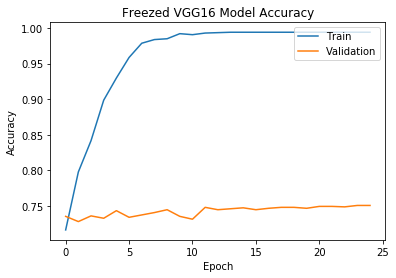

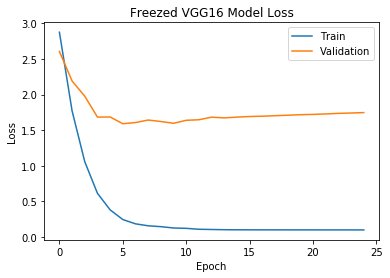

In [17]:
# YOUR CODE HERE

#  "Accuracy"
plt.plot(vgg16FreezedModelHistory.history['acc'])
plt.plot(vgg16FreezedModelHistory.history['val_acc'])
plt.title('Freezed VGG16 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# "Loss"
plt.plot(vgg16FreezedModelHistory.history['loss'])
plt.plot(vgg16FreezedModelHistory.history['val_loss'])
plt.title('Freezed VGG16 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

How does the model perform, compared to the model obtained in step 4? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

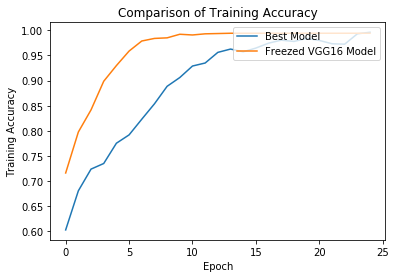

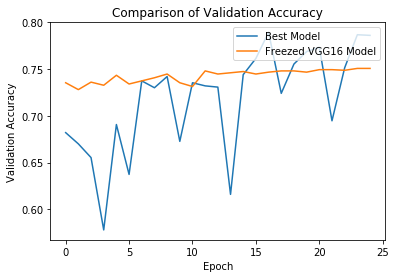

In [19]:

# YOUR CODE HERE

#  "Training Accuracy"
plt.plot(bestModelHistory.history['acc'])
plt.plot(vgg16FreezedModelHistory.history['acc'])
plt.title('Comparison of Training Accuracy')
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.legend(['Best Model', 'Freezed VGG16 Model'], loc='upper right')
plt.show()

# "Loss"
plt.plot(bestModelHistory.history['val_acc'])
plt.plot(vgg16FreezedModelHistory.history['val_acc'])
plt.title('Comparison of Validation Accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['Best Model', 'Freezed VGG16 Model'], loc='upper right')
plt.show()

Compare these results. Which approach worked best, starting from scratch or doing transfer learning? Explain how you evaluated this.

**Your answer:** # The training accuracy of both VGG16 (frozen) model and the best model obtained in task 4 eventually comes to almost same value after many iterations. But when we compare the validation accuracy of both the models, the VGG16 (frozen) model has a constant accuracy between 0.73 and 0.76 even after many iterations. As the number of iterations increases further, the window of variation in validation accuracy become smaller and will be in the range of 0.73 to 0.74. Unlike that, the model we trained in task 4 has varying validation accuracy with the increase in number of epochs with intermittent spikes. The freezed VGG16 model converged to the optmim way better than the model used in task 4

The VGG16 (frozen) model appears to work better because of the consistent accuracy maintained throughout the epochs. It's hard to dive into a conclusion regarding the performance between these models because, the model used in task 4 has lower validation loss compared to VGG16 (frozen) model in most of the epochs. On the other hand, validation accuracy of the model used in task 4 keeps on fluctuating between iterations while VGG16 (frozen) model validation accuracy remains almost consistent. 

We evaluated the validation loss of these models for a reasonable number of epochs using TensorBoard. We found that the validation loss seems to be increasing after certain epoch in each models. We set the epoch with minimum validation loss as a benchmark for these models. We then compared the validation accuracy of these models at their respective benchmark. We found that the model trained using transfer learning has better validation accuracy at the benchmark point

What are the main differences between the ImageNet dataset and the Dogs vs Cats dataset we used?

**Your answer:** 
1. ImageNet is a huge dataset(Over 14 million) compared to the Dogs vs Cats dataset we used. 
2. ImageNet contains over thousand categories whereas our dataset has only two.

Even though there are considerable differences between these datasets, why is it that transfer learning is still a good idea?

**Your answer:** 

Transfer learning is a good idea in the sense that it has already learned on generic features like bars, edges, opposing colors etc. and can be used in our dogs vs cats dataset. We don't have to train a new model from scratch since these features are already learned from a huge dataset - ImageNet. The ConvNet (pre-trained model like VGG16) trained in early layers are on more generic features while in later layers become more dataset specific. The VGG16 without the top layers has already trained on generic features and can be used in our dataset. The size of dataset used here is very small compared to ImageNet. This means that we don't need some complex deep layers as the top layer of the VGG16 because it might overfit the data. Thus we only need to train on some simple layers on the top of VGG16 with a softmax or sigmoid classifier. This makes it more computationally efficient rather than training from scratch.

In which scenario would transfer learning be unsuitable?

**Your answer:** 

Transfer learning is less suitable when the new datset is very huge and different from the original dataset. This is because the pre-trained models are not trained on the generic features of the new dataset. Hence we need to make the model trained on early layers. But, when the data size is huge this will be computationally expensive. The training of such a dataset is like training from scratch and this defeats the purpose of transfer learning

Save the model to a HDF5 file.

In [20]:
newCombinedModel.save('trans_learning_top_only.h5')

### 5.2 Fine-tuning

Now that we have a better starting point for the top layers, we can train the entire network. Unfreeze the bottom layers.

Tip:
- Always recompile your model after changing anything in it!

In [24]:
unfreezedVGG16Model = load_model('trans_learning_top_only.h5')

# YOUR CODE HERE
for i in range(len(vgg16Model.layers)):
    unfreezedVGG16Model.layers[i].trainable = True


initLearningRate=1e-4
opt = Adam(lr=initLearningRate, decay=initLearningRate / epochs)
unfreezedVGG16Model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Create the callbacks (if any) you would like to use for this training here, compile the model, and train it.

Tip:
- Even though we do have a decent starting point for the optimization, it's still possible that a bad hyper-parameter choice wrecks the preinitialization. Make sure to use a small learning rate for this step.

In [25]:
# YOUR CODE HERE

tb = TensorBoard(log_dir='./logs/Final/UnFreezedVGG')
vgg16UnFreezedModelHistory = unfreezedVGG16Model.fit_generator(train_data, epochs=epochs, validation_data=val_data, callbacks=[tb])

Epoch 1/25
110/110 [==============================] - 25s 229ms/step - loss: 0.7810 - acc: 0.6854 - val_loss: 0.4639 - val_acc: 0.7640
Epoch 2/25
110/110 [==============================] - 23s 212ms/step - loss: 0.3882 - acc: 0.8238 - val_loss: 0.3803 - val_acc: 0.8187
Epoch 3/25
110/110 [==============================] - 23s 211ms/step - loss: 0.2988 - acc: 0.8714 - val_loss: 0.3421 - val_acc: 0.8560
Epoch 4/25
110/110 [==============================] - 23s 210ms/step - loss: 0.2720 - acc: 0.8865 - val_loss: 0.3183 - val_acc: 0.8613
Epoch 5/25
110/110 [==============================] - 23s 212ms/step - loss: 0.1703 - acc: 0.9328 - val_loss: 0.3873 - val_acc: 0.8500
Epoch 6/25
110/110 [==============================] - 23s 212ms/step - loss: 0.1448 - acc: 0.9440 - val_loss: 0.6994 - val_acc: 0.7860
Epoch 7/25
110/110 [==============================] - 23s 213ms/step - loss: 0.1071 - acc: 0.9603 - val_loss: 0.5845 - val_acc: 0.8727
Epoch 8/25
110/110 [==============================] - 2

How does the model perform, compared to the model trained with freezed layers? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

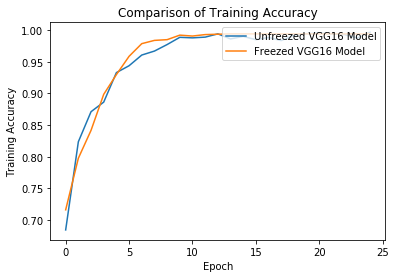

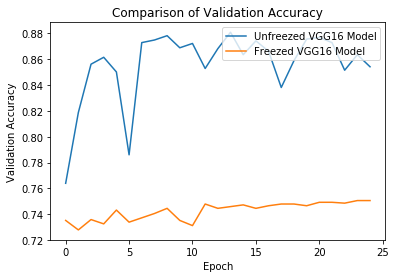

In [26]:
# YOUR CODE HERE

#  "Training Accuracy"
plt.plot(vgg16UnFreezedModelHistory.history['acc'])
plt.plot(vgg16FreezedModelHistory.history['acc'])
plt.title('Comparison of Training Accuracy')
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.legend(['Unfreezed VGG16 Model', 'Freezed VGG16 Model'], loc='upper right')
plt.show()

# "Loss"
plt.plot(vgg16UnFreezedModelHistory.history['val_acc'])
plt.plot(vgg16FreezedModelHistory.history['val_acc'])
plt.title('Comparison of Validation Accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['Unfreezed VGG16 Model', 'Freezed VGG16 Model'], loc='upper right')
plt.show()

Did the model's performance improve? Why (why not)?

**Your answer:** 

The VGG16 model with bottom layers unfreezed when trained on smaller dataset exibited a considerable improvemnent in performance over VGG16 with bottom layers freezed. This is because of the difference in dataset used for the training of original VGG16 and dataset of Dogs vs Cats. The ImageNet consist of a wide variety of images under 1000s of categories. But in the case of Dogs vs Cats, the learning is limited to two categories and hence we can say that these datasets are different. The training only on the top layers like we did for VGG16 (frozen) model would have worked better if the datasets are similar in nature. Because, earlier layers in ConvNet learn the generic features and its same for similar datasets. On the other hand, if the datasets are different, then the generic features learned on earlier layers of ConvNet is of limited use when applied to new dataset. So its better to train the model with bottom layers unfreezed because it fit the dataset more than one with bottom layers frozen.  

Save the model to a HDF5 file.

In [27]:
unfreezedVGG16Model.save('trans_learning_full.h5')

### 5.3 Improving the top model (optional)

Improve the architecture for the layers you add on top of VGG16. Try different ideas, and consider comparing them using tensorboard. When you're happy with one architecture, copy it in the cell below and train it here.

In [ ]:
# YOUR CODE HERE

How does the model perform, compared to the model trained in step 5.2? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

In [ ]:
# YOUR CODE HERE

Save the model to a HDF5 file.

In [ ]:
model.save('best_trans_learning.h5')

## 6. Final training

Now we'll train the model that achieved the best performance so far using the entire dataset.

**Note**: start the optimization with the weights you obtained training in the smaller subset, i.e. *not* from scratch.

First, create two new data generators, one for training samples and one for validation samples. This time, they'll load data from the folders for the entire dataset.

In [30]:
finalModel = load_model('trans_learning_full.h5')

# YOUR CODE HERE

trainDataGenFull = ImageDataGenerator()

valDataGenFull = ImageDataGenerator()

trainDataFull = trainDataGenFull.flow_from_directory(
        trainDatasetPathFull,
        target_size = (56,56),
        batch_size=32,
        class_mode='categorical')

valDataFull = valDataGenFull.flow_from_directory(
        valDatasetPathFull,
        target_size=(56, 56),
        batch_size=32,
        class_mode='categorical')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


Create the callbacks you would like to use and train your model. This optimization might take a long time, so TensorBoard is advised ;).

In [31]:
# YOUR CODE HERE
tb = TensorBoard(log_dir='./logs/Final/FinalVGG')
finalModelHistory = finalModel.fit_generator(trainDataFull, epochs=epochs, validation_data=valDataFull, callbacks=[tb])

Epoch 1/25
625/625 [==============================] - 132s 211ms/step - loss: 0.2333 - acc: 0.9070 - val_loss: 0.1812 - val_acc: 0.9244
Epoch 2/25
625/625 [==============================] - 130s 208ms/step - loss: 0.1395 - acc: 0.9438 - val_loss: 0.2037 - val_acc: 0.9182
Epoch 3/25
625/625 [==============================] - 130s 208ms/step - loss: 0.0895 - acc: 0.9661 - val_loss: 0.1946 - val_acc: 0.9282
Epoch 4/25
625/625 [==============================] - 130s 208ms/step - loss: 0.0609 - acc: 0.9768 - val_loss: 0.3575 - val_acc: 0.9076
Epoch 5/25
625/625 [==============================] - 130s 208ms/step - loss: 0.0479 - acc: 0.9828 - val_loss: 0.2303 - val_acc: 0.9324
Epoch 6/25
625/625 [==============================] - 129s 207ms/step - loss: 0.0389 - acc: 0.9850 - val_loss: 0.2395 - val_acc: 0.9240
Epoch 7/25
625/625 [==============================] - 133s 212ms/step - loss: 0.0361 - acc: 0.9869 - val_loss: 0.2505 - val_acc: 0.9186
Epoch 8/25
625/625 [============================

How does the model perform now when trained on the entire dataset, compared to when only trained on the smaller subset of data? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

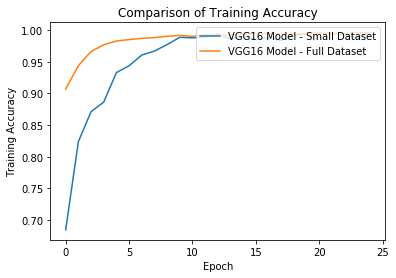

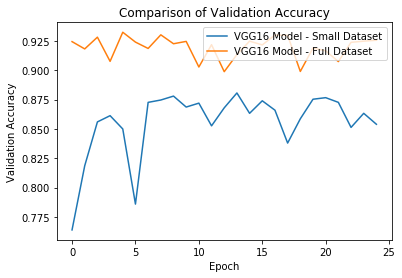

In [32]:
# YOUR CODE HERE

#  "Training Accuracy"
plt.plot(vgg16UnFreezedModelHistory.history['acc'])
plt.plot(finalModelHistory.history['acc'])
plt.title('Comparison of Training Accuracy')
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.legend(['VGG16 Model - Small Dataset', 'VGG16 Model - Full Dataset'], loc='upper right')
plt.show()

# "Loss"
plt.plot(vgg16UnFreezedModelHistory.history['val_acc'])
plt.plot(finalModelHistory.history['val_acc'])
plt.title('Comparison of Validation Accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['VGG16 Model - Small Dataset', 'VGG16 Model - Full Dataset'], loc='upper right')
plt.show()

What can you conclude from these plots?

**Your answer:** 

With the increase in the number of training samples, the model was able to learn better and thus predict more accurately as can be seen from validation accuracy. We can see that model trained on full dataset converge to the optimum better than the model trained on smaller dataset.

## 7. Evaluation on test set

Now we'll evaluate your final model, obtained in step 6, on the test set. As mentioned before, the samples in the test set are not labeled, so we can't compute any performance metrics ourselves. Instead, we'll create a .csv file containing the predictions for each sample, and submit it to Kaggle for evaluation.

Compute the predictions for all samples in the test set according to your best model, and save it in a .csv file with the format expected by the competition.

Tip:
- There is a sample_submission file available for download in the same place where you downloaded the data from. Take a look at it to better understand what is the expected format here.

Hints:
- The Python module `os` has a `listdir` function, which returns the filenames of all files in a given path.
- If you don't know how to create and write to files with Python, Google can help.
- Keras has a submodule called `preprocessing.image`, with some handy functions (for instance `load_img` and `img_to_array`)

In [46]:
# YOUR CODE HERE
img_width, img_height = 56,56
files = os.listdir("./test")


list_of_rows=[]
for i in range(len(files)):
    file = files[i]
    fileId = splitext(file)[0]
    img = load_img("./test/"+file, target_size=(img_width,img_height))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = finalModel.predict(images, batch_size=32)
    list_of_rows.append([fileId, classes[0][1]])
        
outfile = open('./Submission_HA1.csv','w')
writer=csv.writer(outfile)
writer.writerow(['id', 'label'])
writer.writerows(list_of_rows)

Now that you created your submission file, submit it to Kaggle for evaluation. The [old competition](https://www.kaggle.com/c/dogs-vs-cats) does not allow submissions any more, so submit your file to the [new one](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition). Kaggle evaluates your submission according to your log-loss score. Which score did you obtain?

**Your answer:** 0.88319

What was the username you used for this submission?

**Your answer:** nickey.6@gmail.com